<a href="https://colab.research.google.com/github/01Joseph-Hwang10/AI_fundamentals/blob/main/aip2_assign5_20211381.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIP2 Lab Session #5:
# Titanic: Machine Learning from Disaster!
### **2021.10.27**<br/>
---

<br/>

***Library***

- Numpy
- Pandas
- Sklearn

![Sto%CC%88wer_Titanic.jpg](attachment:Sto%CC%88wer_Titanic.jpg)

In [2]:
# This is the library to use for this project.
# It must be executed before the next cell execution.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## 1. Data analysis
$\quad$Before applying the Preprocessing and Machine Learning algorithm, it is important to first understand how the given data is organized. The data presented by this Kaggle Project contains the following information.

<br>
$\quad$Let's take a look at the description and code below to see how the above information is stored in the data and how the data is distributed.
<br>
<br>

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fbd1eb190>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fbd190dd0>]]


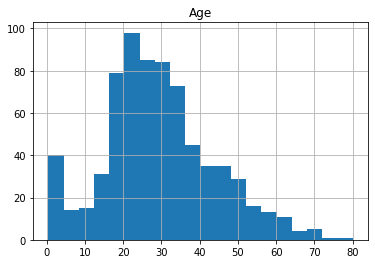

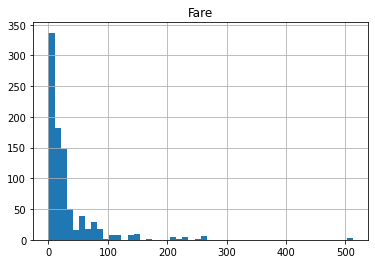

In [4]:
#  Read Data
train_data = pd.read_csv('train.csv');
test_data = pd.read_csv('test.csv');

print(train_data[["Age"]].hist(bins=20))
print(train_data[["Fare"]].hist(bins=50))

$\quad$First, it reads the data. The data includes train.csv for training and test.csv for testing. Use the read_csv function of the pandas library to read both data. The imported data is specified as train_data and test_data, respectively.
<br>

$\quad$It is necessary to check how the above information is stored in the read data. Let's run the code below to check out the parts of train.csv and test.csv.

In [5]:
# read first 5 of train_data
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# read last 5 of train_data
train_data.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


$\quad$train_data is used for each row to display "PassangerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Embarked" information. Here, 11 pieces of information except for "Survived" correspond to the feature, and "Survived" corresponds to the label.
<br>
<br>

In [7]:
# read first 5 of test_data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# read last 5 of test_data
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


$\quad$If you look at test_data, you will see the following information from each row: "PassangerId", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked" are included. Unlike train_data, there is no "Survived" information corresponding to the label because test_data is data used to verify the model.
<br>
<br>
$\quad$As far as we can see, "PassangerId" is simply a feature that is attached for ordering and it is not necessary data to judge whether passennger is actually alive. And because "Pclass", "Age", "SipSp", "Parch", "Fare" are numeric information, machine learning algorithm can be applied even without preprocessing. However, other information such as "Name", "Sex", "Ticket", "Cabin", "Embarked" need appropriate preprocessing such as removing information and extracting new information before vectorization.
<br>
<br>
<br>


$\quad$Now, look at the distribution of given data, the relationship between survivability ("Survived"), and how to preprocess the data.
<br>
<br>
$\quad$First, let's look at the distribution of the numeric information in the data. Execute the following code to check the distribution.

In [9]:
# Analyze numeric information of train_data
train_data.describe(percentiles=[0.25, 0.75])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


$\quad$Note that, count(number of data), mean, std(standard deviation), min(minimum) the upper 25%, 50% 75% and max(maximum) are printed.
<br>
<br>
$\quad$For "count", the number of "PassengerId" is 891, so train_data contains a total of 891 people. For "Age", its count is 714, thus "Age" is not known for 177 passengers.
<br>
<br>
$\quad$Next is mean. You can see that average value of survival rate is 38.4%, ticket class is 2.3, number of sisters and brothers are 0.52 number of parents are 0.38 and the ticket cost is 32.2.
<br>
<br>
$\quad$The next values ​​are min, max, 25%, 50%, and 75%. These values allow us to understand the overall distribution and to make various interpretations. For example, "SibSp" and "Parch" are 1 or 0 in the top 75%, so most passengers boarded alone without a family. And up to 75% of the "Fare" was 31, but the max is 512, so some customers pay a lot more than other customers. If you want to know the value of the upper 60%, 80%, etc., you can change the value inside the percentile of the above code to 0.75, 0.8.
<br>
<br>
$\quad$The distribution of other information, except for the numeric information, can be seen by running the following code:

In [10]:
# Analyze non-numeric information of train_data
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Master. Harold Victor",male,CA. 2343,G6,S
freq,1,577,7,4,644


$\quad$The code above shows the distribution of the non-numeric information "Name", "Sex", "Ticket", "Cabin", "Embarked". The output is "count" (number), "unique" (number of different information), "top" (top information), and "freq" (most frequent).
<br>
<br>
$\quad$For "count", train_data has a total of 891, so most information has 891 values. However, we can confirm that some portions of the information of "Cabin" and "Embarked" are unknown.
<br>
<br>
$\quad$For "Unique", "Name" has the value of 891, so everyone in train_data has a different name. There are two sexes, male and female, so it has a value of 2. Ticket and cabin are 681 and 147, respectively, and there are passengers with the same ticket or cabin number. Finally, since Titanic has three departing ports, so embarked is three.
<br>
<br>
$\quad$"top" is the most common information, and "freq" is the number of that information. Because "Name" is different for each person, freq is 1 and the value of top is not significant. "Sex" is 577 male, so there were 577 men and 314 women passengers. And if you look at "Embarked" you can see that most of the passengers (644) boarded at port "S" (Southampton).
<br>
<br>
<br>
<br>
<br>
<br>
$\quad$Next, we examine how each of feature is related with "Survived".

In [11]:
# Statistics between "Pclass" and "Survived"
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


First, the relationship between "Pclass" and "Survived". The results show that the higher the ticket rating, the higher the survival rate.

In [12]:
# Statistics between "Sex" and "Survived"
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


The survival rate of women is much higher than that of men.

In [13]:
# Statistics between "SibSp" and "Survived"
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


"SibSp" is the number of brothers and sisters. In general, the lower the number of brothers and sisters shows the higher the survival rate.

In [14]:
# Statistics between "Parch" and "Survived"
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


"Parch" is the number of parents and children. The lower the number, as in "SibSp" above, the higher the survival rate.

In [15]:
# Statistics between "Embarked" and "Survived"
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


"Embarked" is the boarding location. The survival rate is much higher than the other areas when the boarding location is "C", and is the lowest for "S" where the most people boarded.

$\quad$
"Pclass", "Sex" and "Embarked" are good features that can be directly related to "Survived". Also, you can use "Sex" and "Embarked" for training after vectorization of "Sex" and restoration of some unknown information of "Embarked".
<br>
<br>
$\quad$"SibSp" and "Parch", as we have seen above, tend to have a high survival rate when the number is small, but it is difficult to find a direct association. Therefore,we may apply the following preprocessing: '0' if the number is small (less or equal to 4) and '1' if it is big (more than 4). Since both of them indicate the number of family members, it is desirable to use "FamilySize" which is the sum of the two values ​​rather than using both of them.

## 2. Preprocessing

$\quad$First, we create a new feature called "FamilySize" by adding "Sibsp" and "Parch".

In [41]:
# Read Data
preprocessing_train_data = pd.read_csv('train.csv')
preprocessing_test_data = pd.read_csv('test.csv')

# Add "SibSp" and "Parch" to make "FamilySize"
preprocessing_train_data['FamilySize'] = preprocessing_train_data['SibSp'] + preprocessing_train_data['Parch']
preprocessing_test_data['FamilySize'] = preprocessing_test_data['SibSp'] + preprocessing_test_data['Parch']

# Delete "SibSp" abd "Parch"
preprocessing_train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
preprocessing_test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Print top 5 values
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


As a result, "SibSp" and "Parch" are combined into one "FamilySize". Now let's look at the following code to see how this feature relates to "Survived".

In [42]:
# Statistics between "FamilySize" and "Survived"
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by="Survived")

,Survived
FamilySize,
7,0.000000
10,0.000000
5,0.136364
4,0.200000
0,0.303538
6,0.333333
1,0.552795
2,0.578431
3,0.724138


To simplify further, we change each value of "FamilySize" to "1" if it is bigger than 4 and "0" if it is smaller than or equal to 4.

In [43]:
# Divide "Family size" into 0 and 1 based on 4
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] > 4, 'FamilySize'] = 1

preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] > 4, 'FamilySize'] = 1

# Print top 5 values
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [44]:
# Statistics between "FamilySize" and "Survived"
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by="Survived")

,Survived
FamilySize,
1,0.148936
0,0.396919



$\quad$"Name", "Ticket", and "Cabin" cannot be directly related to "Survived". Therefore, we may remove these three features.
<br>
<br>
$\quad$However, if you look at "Name", you find information such as 'Mr', 'Mrs', 'Capt', 'Master' and so on. We extract this information from "Name" and create a new feature "Title". After the extraction, "Name", "Ticket" and "Cabin" features are removed.

In [45]:
# Extract "Name" and create "Title"
preprocessing_train_data['Title'] = preprocessing_train_data.Name.str.extract('([A-Za-z]+)\.', expand=False)
preprocessing_test_data['Title'] = preprocessing_test_data.Name.str.extract('([A-Za-z]+)\.', expand=False)

# Delete "Name", "Ticket", "Cabin" features
preprocessing_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
preprocessing_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Print statistics of "Title"
pd.crosstab(preprocessing_train_data['Title'], preprocessing_train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


There are very few passengers with "Title" other than "Master", "Mr", "Mrs", and "Ms". So we replace these rare titles with "Rare" and titles for females such as "MS", "Mlle", and "Mmn" are combined with "Miss". After substitution, we vectorize 'Mr' to '1', 'Miss' to '2', 'Mrs' to '3', 'Master' to '4', 'Rare' to '5' and set '0' if "Title" is unknown. This can be done in the code below.

In [46]:
# The rest except the main "Title" is classified as "Rare"
preprocessing_train_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], inplace=True)
preprocessing_test_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], inplace=True)

# Unify 'Ms', 'Mlle', 'Mme' as 'Miss'
preprocessing_train_data['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
preprocessing_test_data['Title'].replace(['Ms', 'Mlle', 'Mme'], ['Miss', 'Miss', 'Miss'], inplace=True)

pd.crosstab(preprocessing_train_data['Title'], preprocessing_train_data['Sex'])

# "Title" vectorization
preprocessing_train_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)
preprocessing_test_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)

# Set '0' for unknown "Title"
preprocessing_train_data['Title'].replace([None], [0], inplace=True)
preprocessing_test_data['Title'].replace([None], [0], inplace=True)

# Print top 5 values
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,0,1
1,2,1,1,female,38.0,71.2833,C,0,3
2,3,1,3,female,26.0,7.9250,S,0,2
3,4,1,1,female,35.0,53.1000,S,0,3
4,5,0,3,male,35.0,8.0500,S,0,1



$\quad$In case of "Age", there are 177 missing data and we restore them by the average age (30) of the rest of the passengers.


In [47]:
# Restore empty part to average age
preprocessing_train_data['Age'].replace([None], [30], inplace=True)
preprocessing_test_data['Age'].replace([None], [30], inplace=True)

# DIY: Preprocessing
$\quad$(pause the video and complete this part!)
<br>
<br>
$\quad$"Sex" and "Embarked" are information that directly affects "Survived". Therefore, these two pieces of information do not require any preprocessing; we simply restore the missing parts and run vectorization.
<br>
<br>
$\quad$First, we restore the two lost data of "Embarked". In this preproessing, we would like to designate two "Embakred" information as 'S' port where the most passengers have boarded. Then, we set 'female' of 'Sex' to '0', and '1' to 'male', 'Q', 'C', 'S' of 'Embarked' are set to '0' 1 'and' 2 ', respectively. You can do these in the code below.
<br>
<br>
$\quad$**Fill in the '???' part!**

In [48]:
# 1. Fill unknown "Embarked" to 'S'
# >> Which data do we want to edit?
# >> The unknown data is labeled as None, and we want to replace them with 'S'.
# (Hint: The code is almost same as the cell right above!!!)
preprocessing_train_data['Embarked'].replace([None], ['S'], inplace=True)
preprocessing_test_data['Embarked'].replace([None], ['S'], inplace=True)

# 2. "Embarked", "Sex" vectorization
# >> To apply Logistic regression or SVM,
#    we want to convert features that are in string format into numeric values.
# >> Let's replace 'female' --> 0, 'male' --> 1
preprocessing_train_data.replace(['female', 'male'], [0, 1], inplace=True)

# >> Now, replace 'Q' --> 0, 'C' --> 1, 'S' --> 2 in the same way!
preprocessing_train_data.replace(['Q', 'C', 'S'], list(range(3)), inplace=True)

# >> We also need to vectorize the test set.
# >> 'female' --> 0, 'male' --> 1
preprocessing_test_data.replace(['female', 'male'], list(range(2)), inplace=True)
# >> 'Q' --> 0, 'C' --> 1, 'S' --> 2
preprocessing_test_data.replace(['Q', 'C', 'S'], list(range(3)), inplace=True)

# Print top 5 values
preprocessing_train_data[['Sex', 'Embarked']].head()

,Sex,Embarked
0,1,2
1,0,1
2,0,2
3,0,2
4,1,2


In [49]:
# Print result
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,1,22.0,7.2500,2,0,1
1,2,1,1,0,38.0,71.2833,1,0,3
2,3,1,3,0,26.0,7.9250,2,0,2
3,4,1,1,0,35.0,53.1000,2,0,3
4,5,0,3,1,35.0,8.0500,2,0,1


The results contain 7 features which are "Title", "Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize". Note that "Age" and "Fare" need proper normalization. Perform "standardization" for these two features.
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 3. Machine Learning
$\quad$Now we apply machine learning algorithms to preprocessed data. In this project, we will use 'Logistic Regression', and 'SVM'.
<br>
<br>
$\quad$To use each algorithm, we create training data by removing "Survived" and meaningless "PassangerId" from preprocessed data, and extract only "Survived" to create label data, (remove "PassagerId" from the test data), apply each algorithm, predict the test data with the resulting model. The code is shown below.

In [50]:
# Creating data for training
X_train = preprocessing_train_data.drop(['Survived', 'PassengerId'], axis=1)
Y_train = preprocessing_train_data['Survived']
X_test = preprocessing_test_data.drop(['PassengerId'], axis=1)

Accuracy:  83.28
Area Under the Curve:  0.87


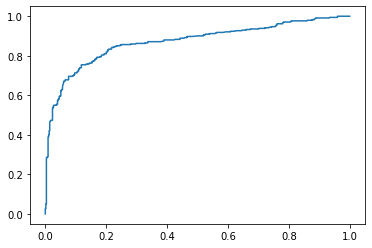

In [51]:
classifier = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the classifier to the training data
classifier.fit(X_train, Y_train)

# Check the accuracy, AUC, and ROC curve of the classifier set above
accuracy = classifier.score(X_train, Y_train) * 100
Y_train_pred = classifier.predict_proba(X_train)[:, 1]

FPR, TPR, thresholds = roc_curve(Y_train, Y_train_pred)
AUC = roc_auc_score(Y_train, Y_train_pred)

plt.plot(FPR, TPR)
print("Accuracy: ", "{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))

In [52]:
# Test data prediction
predict = classifier.predict(X_test)
predict = np.round(predict)

# This is how the model predicted
result = test_data.copy()
result["PREDICTION"] = predict
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


# DIY: SVM classifier
$\quad$Now, you can do the same thing with SVM. Apply SVM to the training data and check the result.
<br>
<br>
$\quad$**Fill in the '???' part!**

Accuracy:  68.46
Area Under the Curve:  0.78


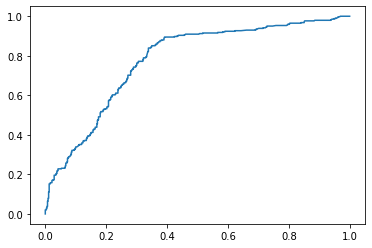

In [53]:
# 1. Create a SVM classifier from scikit-learn:
#    remember that we imported SVC from sklearn.svm!
# (Note: you need to set 'probability' argument to True)
classifier = SVC(probability=True)

# >> Train the classifier with the training set we preprocessed.
# >> Use fit() method.
classifier.fit(X_train, Y_train)

# >> Check the model accuracy on training set
# >> You can get the mean accuracy of a given dataset and labels
#    with score() method
accuracy = classifier.score(X_train, Y_train) * 100

# 2. Draw ROC curve on training set
# >> First, you need to compute probabilities of each labels for training set.
#    (which means you need to make *model predictions* for training set)
# >> You can do this with predict_proba() method
Y_train_pred = classifier.predict_proba(X_train)[:, 1]

# >> Calculate false positive rates, true positive rates,
#    and area under the curve (AUC) with
#    ground truth labels & predicted probability
FPR, TPR, thresholds = roc_curve(Y_train, Y_train_pred)
AUC = roc_auc_score(Y_train, Y_train_pred)

# Plot ROC curve.
# (hint: use plt.plot() to plot FPR and TPR)
plt.plot(FPR, TPR)

print("Accuracy: ", "{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))

In [54]:
# Test data prediction
predict = classifier.predict(X_test)
predict = np.round(predict)

# This is how the model predicted
result = test_data.copy()
result["PREDICTION"] = predict
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
